# 따릉이 월별 탄소량 계산 (2022년1월~12월)

In [1]:
### colab : matplotlib 한글 인식 (방법1)

# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,771 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

In [3]:
### 폰트 설치 후에 '런타임' > '세션 다시 시작' 하여 --> 여기서부터 ("이후 셀 실행")

### 설치한 나눔폰트로 설정 변경하기

## 필요한 함수 / 라이브러리 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

# 폰트 지정 : 나눔바른고딕 폰트로 바꾸기
plt.rc('font', family='NanumBarunGothic')

# # 폰트 지정 : Malgun Gothic 폰트로 바꾸기
# plt.rc('font', family='Malgun Gothic')

# 설정된 font.family 확인하기
plt.rcParams['font.family']

['NanumBarunGothic']

## 데이터 불러오기

### 상반기 데이터 구성하기

In [13]:
# 필요한 라이브러리 import
import os
dir = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data1'
files = os.listdir(dir)
print(files)

['서울특별시 공공자전거 이용정보(시간대별)_22.01.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.02.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.03.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.04.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.05.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.06.csv']


In [14]:
# 2022년 상반기(1월~6월) DataFrame 생성

df_2022_sang = pd.DataFrame()

for file in files :
    file_path = dir + '/' + file
    df = pd.read_csv(file_path, encoding='cp949')
    df_2022_sang = pd.concat([df_2022_sang, df])

# 상반기 결과 확인하기
print(df_2022_sang.shape)
print('-'*80)
df_2022_sang.iloc[2000:2002, :]

(16328256, 12)
--------------------------------------------------------------------------------


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
2000,2022-01-01,5,1240,1240. 문정 법조단지4,일일권,M,20대,1,0.00,0.00,0.0,16
2001,2022-01-01,5,1539,1539. 4.19민주묘지역,일일권,M,30대,1,41.70,0.38,1620.0,13


In [15]:
# 데이터 크기가 커서 '대여일자', '탄소량' 컬럼만 사용
df_bike_sang = df_2022_sang.loc[:,('대여일자','탄소량')]

In [16]:
# 상반기 결과 확인하기
print(df_bike_sang.shape)
print('-'*80)
df_bike_sang.iloc[2000:2002, :]

(16328256, 2)
--------------------------------------------------------------------------------


,대여일자,탄소량
2000,2022-01-01,0.00
2001,2022-01-01,0.38


In [17]:
df_bike_sang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16328256 entries, 0 to 3704327
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   대여일자    object
 1   탄소량     object
dtypes: object(2)
memory usage: 373.7+ MB


In [21]:
### 탄소량 컬럼 -> '\N' -> -1 로 대체
# 탄소량 컬럼을 수치형 데이터로 변경하려고 하면 '\N' 때문에 error 발생되어 -1 로 대체함
df_bike_sang.iloc[:,1] = df_bike_sang.iloc[:,1].replace(r'\N',-1) # 탄소량

### 탄소량 컬럼 numeric으로 형변환
df_bike_sang["탄소량"] = pd.to_numeric(df_bike_sang["탄소량"]) # 탄소량

In [22]:
# 대여일자를 datetime으로 형변환해서 년,월,일 컬럼 추가
df_bike_sang['일자(date)'] = pd.to_datetime(df_bike_sang['대여일자'])
df_bike_sang['년'] = df_bike_sang['일자(date)'].dt.year
df_bike_sang['월'] = df_bike_sang['일자(date)'].dt.month
df_bike_sang['일'] = df_bike_sang['일자(date)'].dt.day

In [23]:
df_bike_sang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16328256 entries, 0 to 3704327
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일자      object        
 1   탄소량       float64       
 2   일자(date)  datetime64[ns]
 3   년         int64         
 4   월         int64         
 5   일         int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 872.0+ MB


In [27]:
df_bike_sang.iloc[5000000:5000002, :]

,대여일자,탄소량,일자(date),년,월,일
170019,2022-04-02,0.32,2022-04-02,2022,4,2
170020,2022-04-02,0.55,2022-04-02,2022,4,2


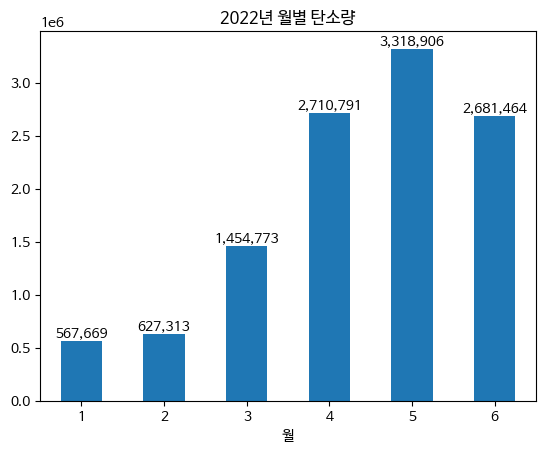

In [46]:
# 월별 탄소량 합계
carbon_per_month_sang = df_bike_sang.groupby('월')['탄소량'].sum()

### 일별 탄소량 시각화
ax = carbon_per_month_sang.plot(kind='bar', title="2022년 월별 탄소량", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

### 하반기 데이터 구성하기

In [30]:
# 필요한 라이브러리 import
dir = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data2'
files = os.listdir(dir)
print(files)

['서울특별시 공공자전거 이용정보(시간대별)_22.12.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.07.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.08.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.09.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.10.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.11.csv']


In [ ]:
# 2022년 하반기(7월~12월) DataFrame 생성

df_2022_ha = pd.DataFrame()

for file in files :
    file_path = dir + '/' + file
    df = pd.read_csv(file_path, encoding='cp949')
    df_2022_ha = pd.concat([df_2022_ha, df])

# 상반기 결과 확인하기
print(df_2022_ha.shape)
print('-'*80)
df_2022_ha.iloc[2000:2002, :]

In [31]:
# 2022년 하반기(7월~12월) DataFrame 생성

df_2022_ha = pd.DataFrame()

for file in files :
    file_path = dir + '/' + file
    df = pd.read_csv(file_path, encoding='cp949')
    df_2022_ha = pd.concat([df_2022_ha, df])

# 하반기 결과 확인하기
print(df_2022_ha.shape)
print('-'*80)
df_2022_ha.iloc[2000:2002, :]

(19832231, 12)
--------------------------------------------------------------------------------


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
2000,2022-12-01,1,779,779. 신정1동 주민센터 앞,일일권,M,기타,1,255.66,1.25,5380.0,69
2001,2022-12-01,1,1274,1274. 영파여고 앞,정기권,NaN,20대,1,15.70,0.14,610.0,3


In [41]:
# 데이터 크기가 커서 '대여일자', '탄소량' 컬럼만 사용
df_bike_ha = df_2022_ha.loc[:,('대여일자','탄소량')]

In [42]:
# 상반기 결과 확인하기
print(df_bike_ha.shape)
print('-'*80)
df_bike_ha.iloc[2000:2002, :]

(19832231, 2)
--------------------------------------------------------------------------------


,대여일자,탄소량
2000,2022-12-01,1.25
2001,2022-12-01,0.14


In [43]:
### 탄소량 컬럼 -> '\N' -> -1 로 대체
# 탄소량 컬럼을 수치형 데이터로 변경하려고 하면 '\N' 때문에 error 발생되어 -1 로 대체함
df_bike_ha.iloc[:,1] = df_bike_ha.iloc[:,1].replace(r'\N',-1) # 탄소량

### 탄소량 컬럼 numeric으로 형변환
df_bike_ha["탄소량"] = pd.to_numeric(df_bike_ha["탄소량"]) # 탄소량

In [44]:
# 대여일자를 datetime으로 형변환해서 년,월,일 컬럼 추가
df_bike_ha['일자(date)'] = pd.to_datetime(df_bike_ha['대여일자'])
df_bike_ha['년'] = df_bike_ha['일자(date)'].dt.year
df_bike_ha['월'] = df_bike_ha['일자(date)'].dt.month
df_bike_ha['일'] = df_bike_ha['일자(date)'].dt.day

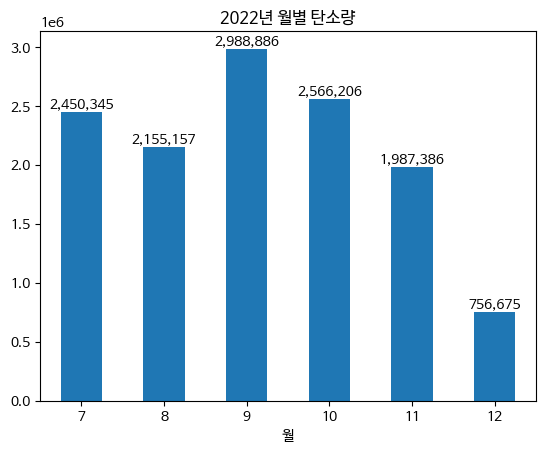

In [47]:
# 월별 탄소량 합계
carbon_per_month_ha = df_bike_ha.groupby('월')['탄소량'].sum()

### 일별 탄소량 시각화
ax = carbon_per_month_ha.plot(kind='bar', title="2022년 월별 탄소량", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

In [50]:
# 상하반기 합치기

df_bike = pd.concat([df_bike_sang, df_bike_ha], axis=0)

In [52]:
# 합친 결과 확인하기
print(df_bike.shape)
print('-'*80)
df_bike_ha.iloc[800000:800002, :]

(36160487, 6)
--------------------------------------------------------------------------------


,대여일자,탄소량,일자(date),년,월,일
800000,2022-12-12,0.17,2022-12-12,2022,12,12
800001,2022-12-12,0.45,2022-12-12,2022,12,12


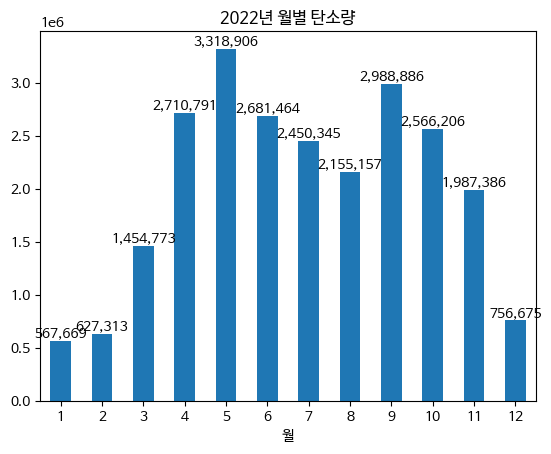

In [53]:
# 월별 탄소량 합계
carbon_per_month = df_bike.groupby('월')['탄소량'].sum()

### 일별 탄소량 시각화
ax = carbon_per_month.plot(kind='bar', title="2022년 월별 탄소량", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

In [54]:
### 2022년 전체 탄소량 합계

total_carbon = df_bike['탄소량'].values.sum()

print(f'2022년 탄소량 합계 = {format(total_carbon,",.0f")}g(그램)')

# 따릉이 탄소 저감 정책 기준 1t (톤) 당 40,000~60,000원
total_carbon_price = total_carbon/1000*60000

print('-'*80)
print(f'2022년 연간 탄소량 저감 금액 = {format(total_carbon_price,",.0f")}원 ')

2022년 탄소량 합계 = 24,265,572g(그램)
--------------------------------------------------------------------------------
2022년 연간 탄소량 저감 금액 = 1,455,934,295원 
